<a href="https://colab.research.google.com/github/WANGCIPEI/libpku/blob/master/%E2%80%9C%E6%AC%A2%E8%BF%8E%E4%BD%BF%E7%94%A8_Colaboratory%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

64245


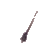

In [0]:
#coding=utf-8

import cv2 as cv
from google.colab.patches import cv2_imshow

bg_color = [255,255,255]

def calc_diff(pixel):
    return (pixel[0]-bg_color[0])**2 + (pixel[1]-bg_color[1])**2 + (pixel[2]-bg_color[2])**2

def remove_bg():
    image_path = '/content/2.png'
    pic = cv.imread(image_path)
    pic = cv.cvtColor(pic,cv.COLOR_BGR2BGRA)
    h, w = pic.shape[0:2]
    for i in range(h):
        for j in range(w):
            if calc_diff(pic[i][j]) < 20000:
                pic[i][j][0] = 255
                pic[i][j][1] = 255
                pic[i][j][2] = 255
    return pic

if __name__ == '__main__':
    pic = remove_bg()
    print(calc_diff([206,125,43]))
    remove_bg()
    cv2_imshow(pic)
    cv.imwrite("2.1.png", pic, [int(cv.IMWRITE_PNG_COMPRESSION)]) 

In [0]:
import numpy as np  
import cv2  
from google.colab.patches import cv2_imshow

#create a black use numpy,size is:512*512
img = np.zeros((512,512,3), np.uint8)   
#fill the image with white
img.fill(255)
cv.imwrite('blank.png',img,[int(cv.IMWRITE_PNG_COMPRESSION)])

True

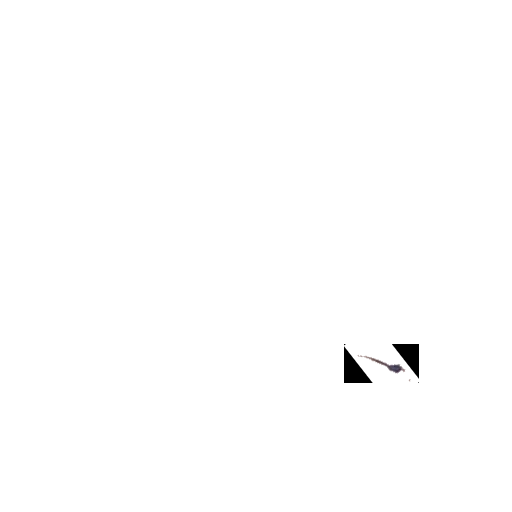

In [74]:
import cv2
import random
import numpy as np
from math import cos,sin,radians
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def overlay_image_alpha(img, img_overlay, pos, alpha_mask):

    x, y = pos

    # Image ranges
    y1, y2 = max(0, y_offset), min(img.shape[0], y + img_overlay.shape[0])
    x1, x2 = max(0, x_offset), min(img.shape[1], x + img_overlay.shape[1])

    # Overlay ranges
    y1o, y2o = max(0, -y_offset), min(img_overlay.shape[0], img.shape[0] - y)
    x1o, x2o = max(0, -x_offset), min(img_overlay.shape[1], img.shape[1] - x)

    # Exit if nothing to do
    if y1 >= y2 or x1 >= x2 or y1o >= y2o or x1o >= x2o:
        return
    alpha = alpha_mask[y1o:y2o, x1o:x2o]
    alpha_inv = 1.0 - alpha
    channels = img.shape[2]
    for c in range(channels):
        img[y1:y2, x1:x2, c] = (alpha * img_overlay[y1o:y2o, x1o:x2o, c] + alpha_inv * img[y1:y2, x1:x2, c])

def rotate(image, angle, center = None, scale = 1.0):

    (h, w) = s_img.shape[:2]

    if center is None:
        center = (w / 2, h / 2)

    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated

s_img = cv2.imread("/content/1.1.png")
l_img = cv2.imread("/content/blank.png")
s_img = rotate(image, angle, center = None, scale = 1.0)
#(h,w) = s_img.shape[:2]
#center = (w / 2,h / 2)
#angle = random.randint(0,360)
#M = cv2.getRotationMatrix2D(center,angle,1)#旋转缩放矩阵：(旋转中心，旋转角度，缩放因子)  旋转45度，缩放0.75
#rotated = cv2.warpAffine(l_img,M,(w,h))
#cv2_imshow(rotated)
x_offset=y_offset=random.randint(0,512)
l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img
s_img = cv2.imread("/content/1.1.png")

cv2_imshow(l_img) 

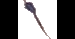

In [68]:
import numpy as np
import cv2
from math import cos,sin,radians
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/1.1.png')

height, width, channel = img.shape

# 求得图片中心点， 作为旋转的轴心
cx = int(width / 2)
cy = int(height / 2)
# 旋转的中心
center = (cx, cy)

new_dim = (width, height)

# 进行2D 仿射变换
# 围绕原点 逆时针旋转30度
M = cv2.getRotationMatrix2D(center=center,angle=90, scale=1.0)
rotated_30 = cv2.warpAffine(img, M, new_dim)
cv2_imshow(rotated_30)